## Load Library

In [ ]:
# Hapus from google.colab import drive (jika tidak menggunakan google colab)
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import validation_curve, learning_curve

## Load Dataset

In [ ]:
# Jika menggunakan google colab
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Breast Cancer.csv', sep=",")
data

Mounted at /content/drive


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Feature Engineering

In [ ]:
# Check kolom data apakah ada yang missing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# mencari nilai null
data.isnull().values.any()

False

In [ ]:
#mengubah B dan M pada kolom diagnosis menjadi 1 dan 0
data['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
#checking skewness antara cancer M dan B
breast_cancer_malignant = len(data.loc[data['diagnosis'] == 1])
breast_cancer_benign = len(data.loc[data['diagnosis'] == 0])

(breast_cancer_malignant, breast_cancer_benign)

(212, 357)

In [ ]:
#mencari missing value yang bernilai nol
for val in data.columns:
  if(val != "diagnosis"  and val != "id"):
    print('Banyak baris nilai nol untuk {0} : {1}'.format(val, len(data.loc[data[val] == 0])))

Banyak baris nilai nol untuk radius_mean : 0
Banyak baris nilai nol untuk texture_mean : 0
Banyak baris nilai nol untuk perimeter_mean : 0
Banyak baris nilai nol untuk area_mean : 0
Banyak baris nilai nol untuk smoothness_mean : 0
Banyak baris nilai nol untuk compactness_mean : 0
Banyak baris nilai nol untuk concavity_mean : 13
Banyak baris nilai nol untuk concave points_mean : 13
Banyak baris nilai nol untuk symmetry_mean : 0
Banyak baris nilai nol untuk fractal_dimension_mean : 0
Banyak baris nilai nol untuk radius_se : 0
Banyak baris nilai nol untuk texture_se : 0
Banyak baris nilai nol untuk perimeter_se : 0
Banyak baris nilai nol untuk area_se : 0
Banyak baris nilai nol untuk smoothness_se : 0
Banyak baris nilai nol untuk compactness_se : 0
Banyak baris nilai nol untuk concavity_se : 13
Banyak baris nilai nol untuk concave points_se : 13
Banyak baris nilai nol untuk symmetry_se : 0
Banyak baris nilai nol untuk fractal_dimension_se : 0
Banyak baris nilai nol untuk radius_worst : 0


In [ ]:
# mengcopy data ke variable baru
new_data = data.copy()

In [ ]:
#membuat mean dari data
avg_concavity_mean = new_data['concavity_mean'].mean()
avg_concave_points_mean = new_data['concave points_mean'].mean()
avg_concavity_se = new_data['concavity_se'].mean()
avg_concave_points_se = new_data['concave points_se'].mean()
avg_concavity_worst = new_data['concavity_worst'].mean()
avg_concave_points_worst = new_data['concave points_worst'].mean()

In [ ]:
#replace data dengan nilai mean
new_data['concavity_mean'].replace({0:avg_concavity_mean}, inplace=True)
new_data['concave points_mean'].replace({0:avg_concave_points_mean}, inplace=True)
new_data['concavity_se'].replace({0:avg_concavity_se}, inplace=True)
new_data['concave points_se'].replace({0:avg_concave_points_se}, inplace=True)
new_data['concavity_worst'].replace({0:avg_concavity_worst}, inplace=True)
new_data['concave points_worst'].replace({0:avg_concave_points_worst}, inplace=True)

In [ ]:
#Melakukan pengecekan missing value
for val in new_data.columns:
  if(val != "diagnosis"  and val != "id"):
    print('Banyak baris nilai nol untuk {0} : {1}'.format(val, len(new_data.loc[new_data[val] == 0])))

Banyak baris nilai nol untuk radius_mean : 0
Banyak baris nilai nol untuk texture_mean : 0
Banyak baris nilai nol untuk perimeter_mean : 0
Banyak baris nilai nol untuk area_mean : 0
Banyak baris nilai nol untuk smoothness_mean : 0
Banyak baris nilai nol untuk compactness_mean : 0
Banyak baris nilai nol untuk concavity_mean : 0
Banyak baris nilai nol untuk concave points_mean : 0
Banyak baris nilai nol untuk symmetry_mean : 0
Banyak baris nilai nol untuk fractal_dimension_mean : 0
Banyak baris nilai nol untuk radius_se : 0
Banyak baris nilai nol untuk texture_se : 0
Banyak baris nilai nol untuk perimeter_se : 0
Banyak baris nilai nol untuk area_se : 0
Banyak baris nilai nol untuk smoothness_se : 0
Banyak baris nilai nol untuk compactness_se : 0
Banyak baris nilai nol untuk concavity_se : 0
Banyak baris nilai nol untuk concave points_se : 0
Banyak baris nilai nol untuk symmetry_se : 0
Banyak baris nilai nol untuk fractal_dimension_se : 0
Banyak baris nilai nol untuk radius_worst : 0
Bany

## Step EDA(exploratory data analysis)

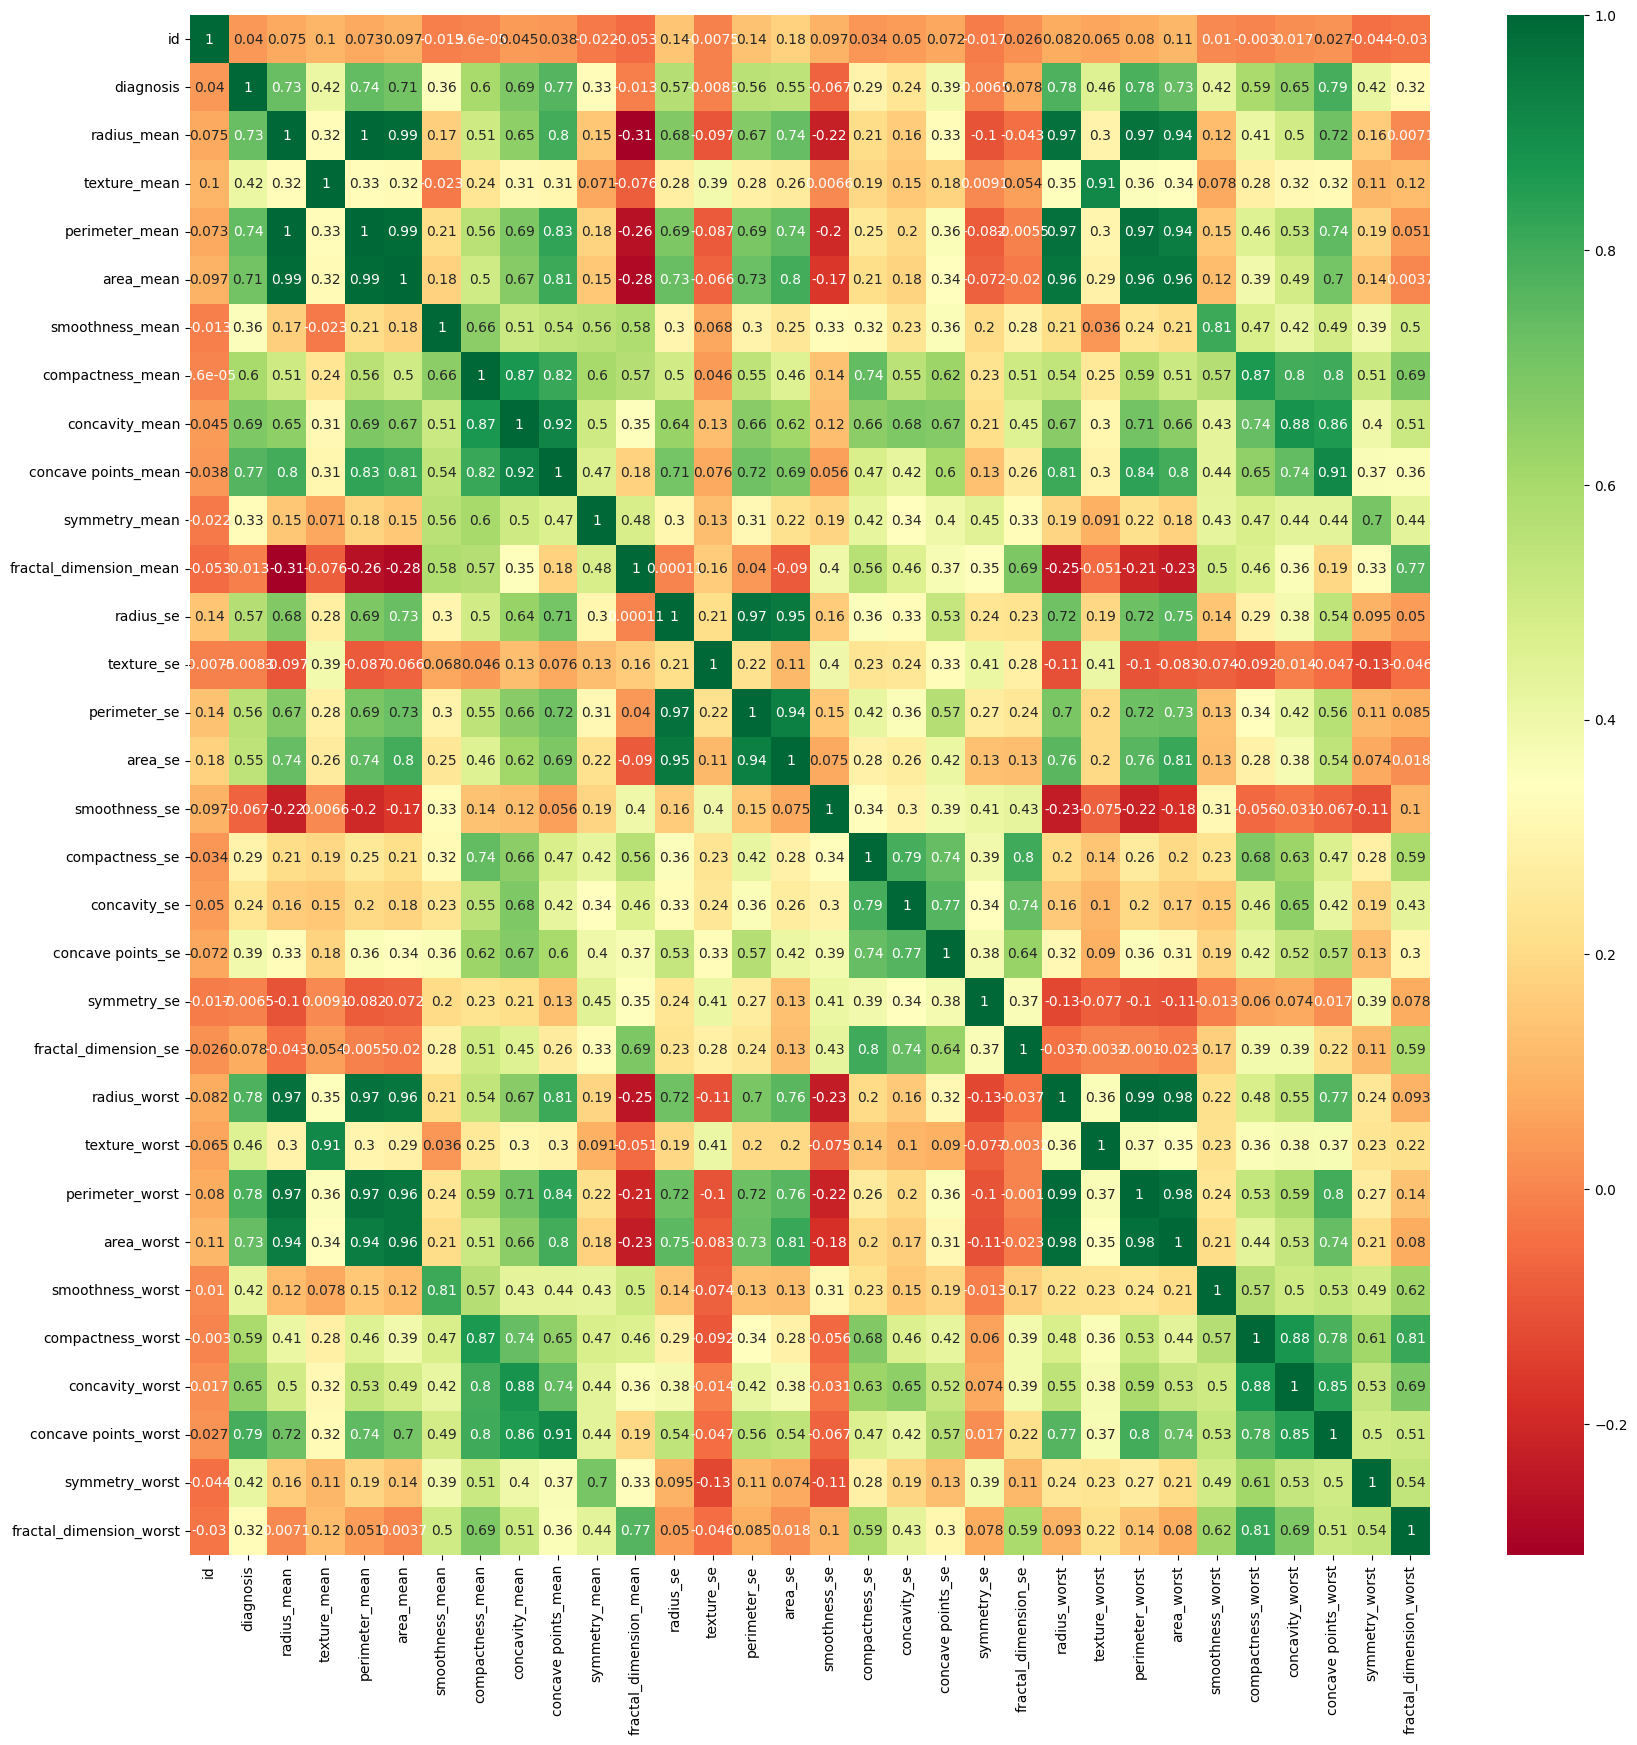

In [ ]:
#Korelasi menggunakan heatmap
correlation = new_data.corr()
features = correlation.index
plt.figure(figsize=(20,20))

#ploting dengan heatmap
corr_heatmap = sns.heatmap(new_data[features].corr(), annot=True, cmap="RdYlGn")

In [ ]:
#mengambil kolom yang memiliki korelasi kuat
new_data = new_data[['diagnosis','radius_mean','area_mean', 'radius_se', 'area_se', 'smoothness_mean','smoothness_se']]
new_data

,diagnosis,radius_mean,area_mean,radius_se,area_se,smoothness_mean,smoothness_se
0,1,17.99,1001.0,1.0950,153.40,0.11840,0.006399
1,1,20.57,1326.0,0.5435,74.08,0.08474,0.005225
2,1,19.69,1203.0,0.7456,94.03,0.10960,0.006150
3,1,11.42,386.1,0.4956,27.23,0.14250,0.009110
4,1,20.29,1297.0,0.7572,94.44,0.10030,0.011490
...,...,...,...,...,...,...,...
564,1,21.56,1479.0,1.1760,158.70,0.11100,0.010300
565,1,20.13,1261.0,0.7655,99.04,0.09780,0.005769
566,1,16.60,858.1,0.4564,48.55,0.08455,0.005903
567,1,20.60,1265.0,0.7260,86.22,0.11780,0.006522


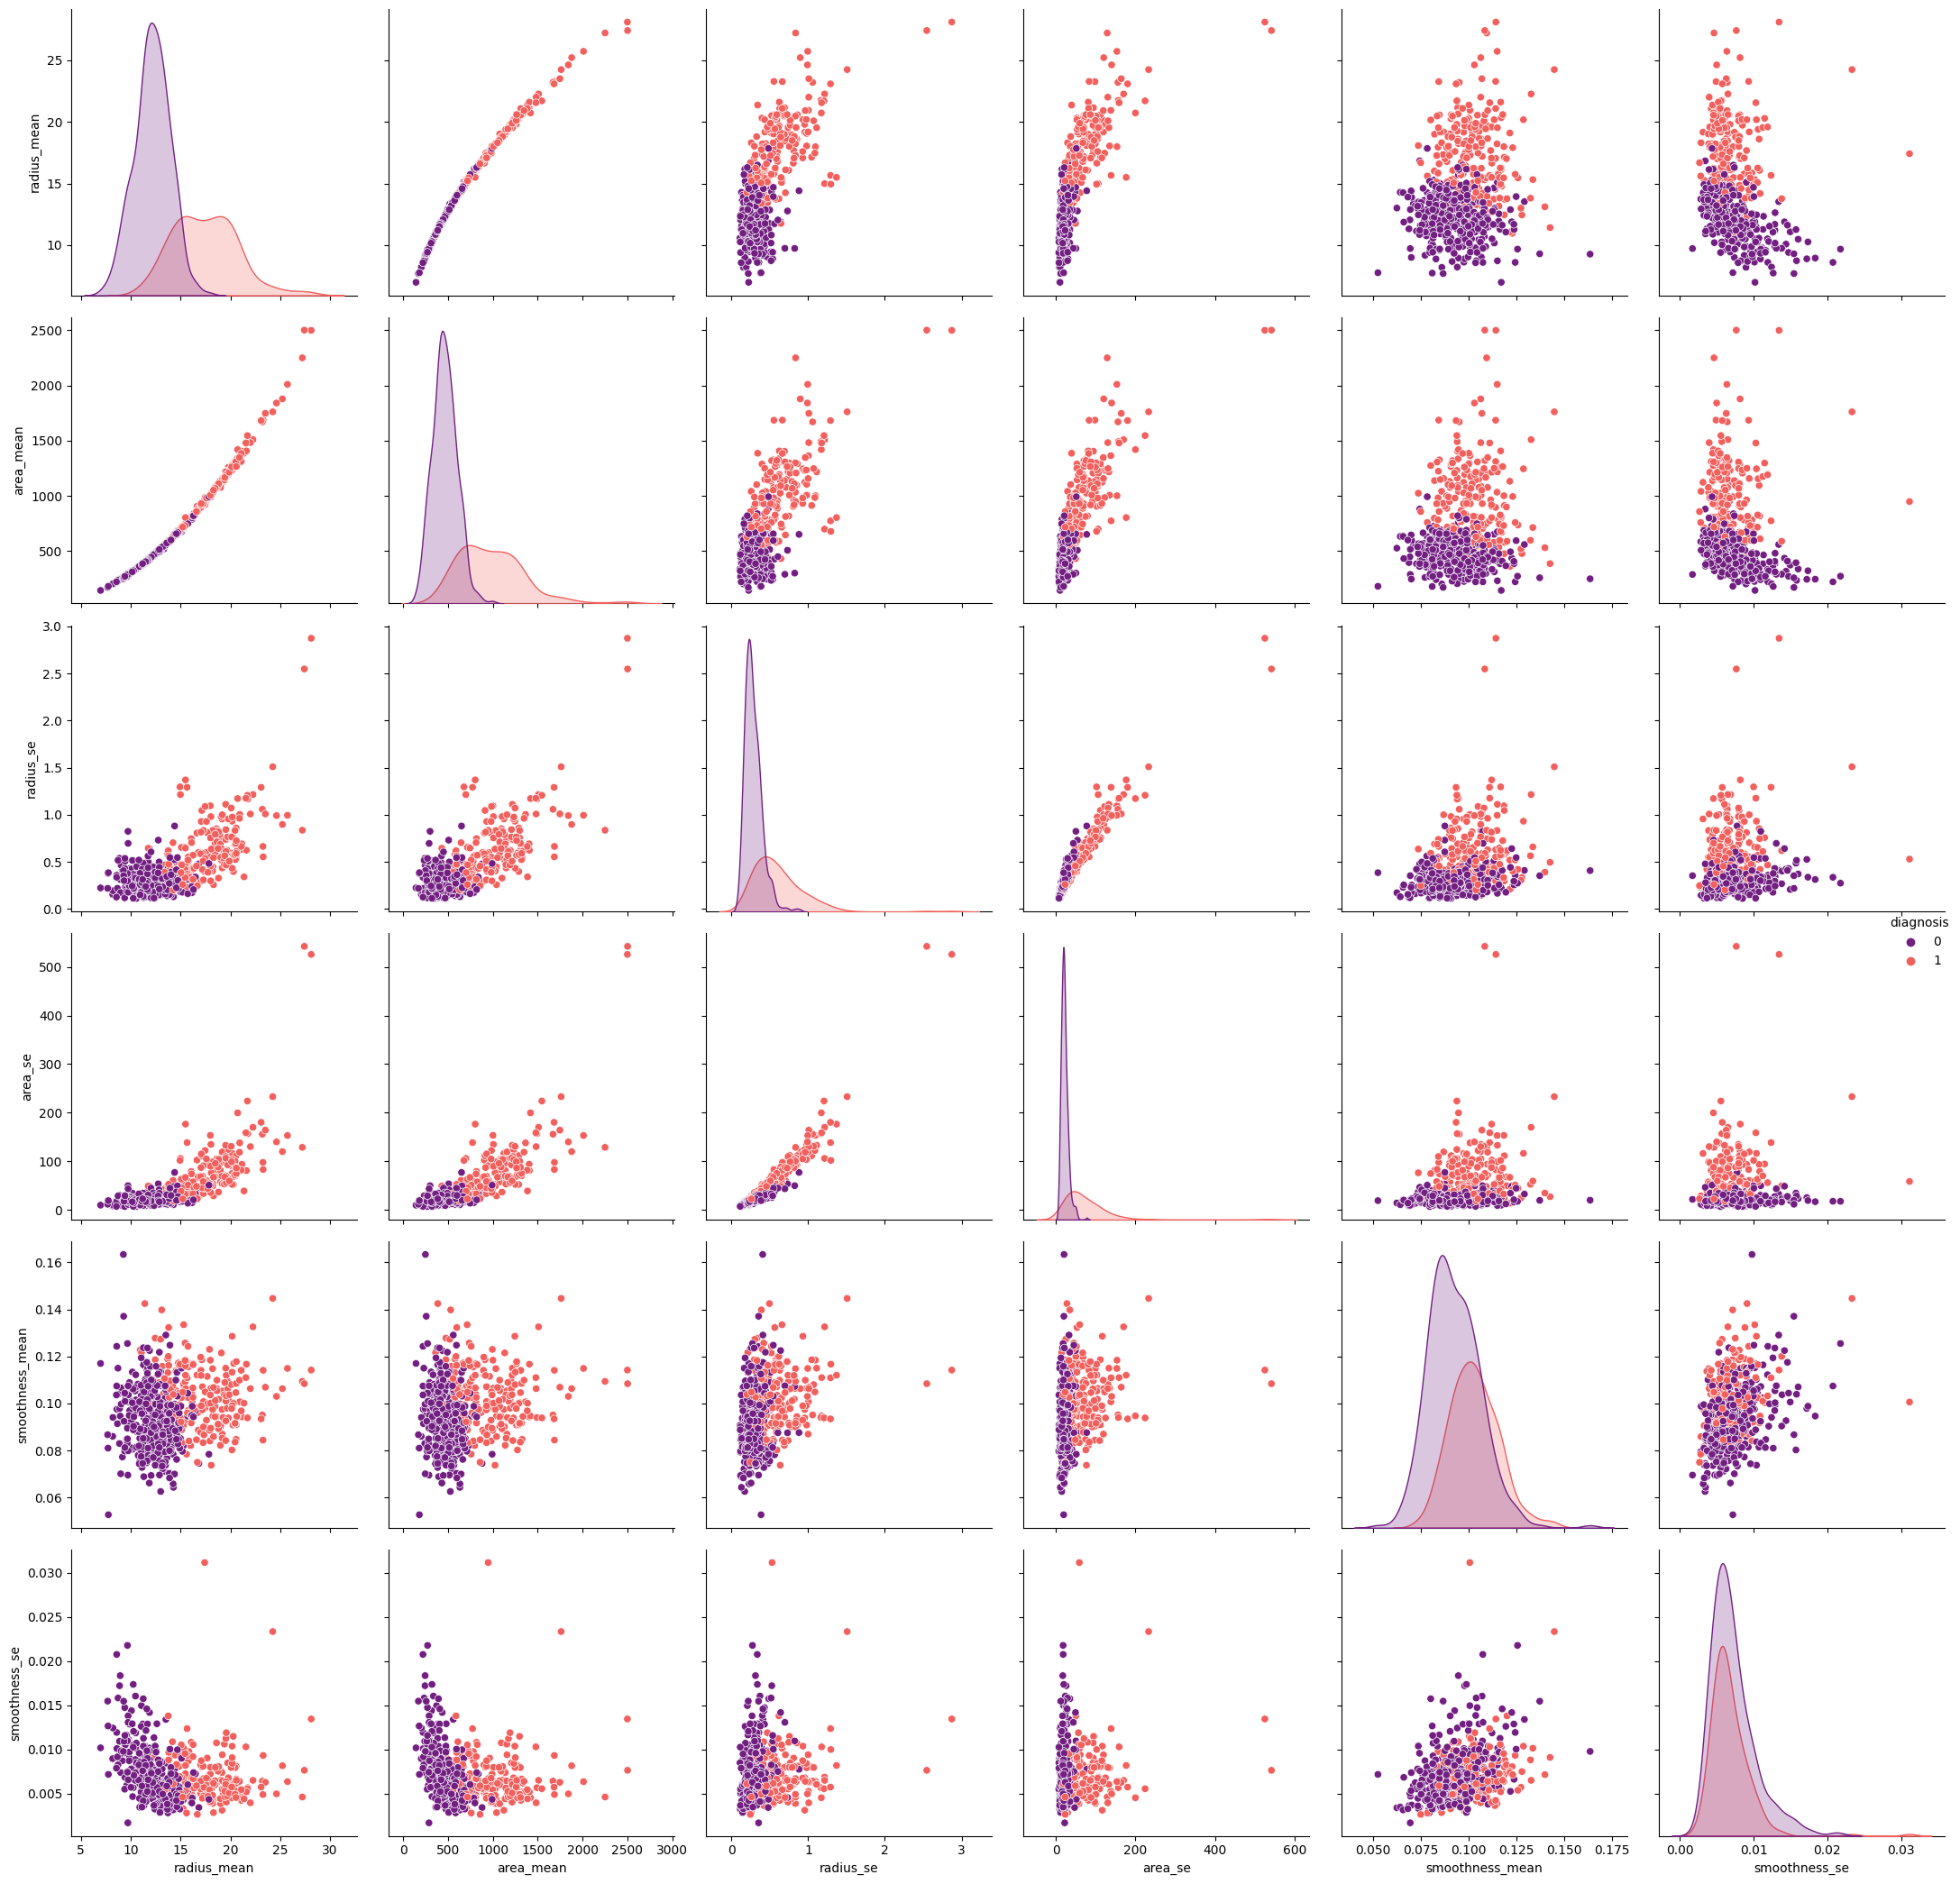

In [ ]:
#make pairplot
sns.pairplot(new_data, hue="diagnosis", palette='magma', height=3.5)
plt.tight_layout()

## Apply Model

In [ ]:
#split data nilai x dan y
x = new_data.drop('diagnosis', axis=1)
y = new_data['diagnosis']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

## Logistic Regresion

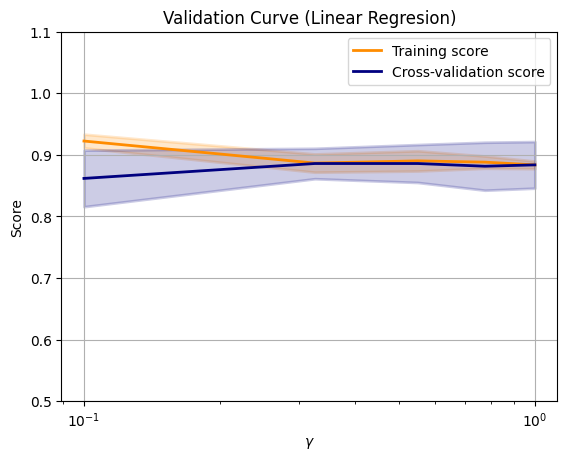

In [ ]:
param_range = np.linspace(0.1, 1.0, 5)

lr_model = LogisticRegression(solver='liblinear', random_state=20)

train_size_abs, train_scores, test_scores = learning_curve(
    lr_model, x_train, y_train, train_sizes=param_range
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot hasil
plt.figure()
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)

plt.title("Validation Curve (Linear Regresion)")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.5, 1.1)
plt.grid()
plt.legend(loc="best")
plt.show()

In [ ]:
lr_model.fit(x_train, y_train)
lr_prediction = lr_model.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, lr_prediction))
print(classification_report(y_test, lr_prediction))

[[70  1]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
x_test

,radius_mean,area_mean,radius_se,area_se,smoothness_mean,smoothness_se
204,12.47,481.9,0.3961,30.29,0.09965,0.006953
70,18.94,1130.0,0.7888,96.05,0.09009,0.004444
131,15.46,748.9,0.4743,48.31,0.10920,0.006240
431,12.40,467.8,0.1767,15.43,0.10540,0.010000
540,11.54,402.9,0.2784,20.86,0.09984,0.012150
...,...,...,...,...,...,...
486,14.64,666.0,0.2204,19.98,0.08641,0.003535
75,16.07,817.7,0.7474,79.25,0.09168,0.010820
249,11.52,406.3,0.2562,18.62,0.10130,0.006662
238,14.22,623.9,0.3354,29.96,0.08223,0.006307


In [ ]:
#Ekspor model dengan pickle
import pickle

pickle.dump(lr_model, open('logistic_regresion.pkl', 'wb'))